# Disposition

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv('../../curated data/DS_2020-09-04.csv')
df.head()

,STUDYID,DOMAIN,USUBJID,DSSEQ,DSGRPID,DSREFID,DSSPID,DSTERM,DSMODIFY,DSDECOD,DSCAT,DSSCAT,VISITNUM,VISIT,VISITDY,EPOCH,DSDY,DSSTDY,DSSTRF,DSCDSTDY
0,EJPDEJ,DS,8027,1,NaN,NaN,NaN,Recovered,DISCHARGED RECOVERED,RECOVERY,DISPOSITION EVENT,NaN,NaN,NaN,NaN,TREATMENT,NaN,6.0,NaN,NaN
1,EJPDEJ,DS,3315,1,NaN,NaN,NaN,No case,DISCHARGED NEGATIVE,SCREEN FAILURE,DISPOSITION EVENT,NaN,NaN,NaN,NaN,TREATMENT,NaN,2.0,NaN,NaN
2,EJPDEJ,DS,1953,1,NaN,NaN,NaN,No case,DISCHARGED NEGATIVE,SCREEN FAILURE,DISPOSITION EVENT,NaN,NaN,NaN,NaN,TREATMENT,NaN,3.0,NaN,NaN
3,EJPDEJ,DS,9366,1,NaN,NaN,NaN,Deceased,DECEASED EBOLA,DEATH,DISPOSITION EVENT,NaN,NaN,NaN,NaN,TREATMENT,NaN,6.0,NaN,NaN
4,EJPDEJ,DS,6561,1,NaN,NaN,NaN,No case,DISCHARGED NEGATIVE,SCREEN FAILURE,DISPOSITION EVENT,NaN,NaN,NaN,NaN,TREATMENT,NaN,1.0,NaN,NaN


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10317 entries, 0 to 10316
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   10317 non-null  object 
 1   DOMAIN    10317 non-null  object 
 2   USUBJID   10317 non-null  int64  
 3   DSSEQ     10317 non-null  int64  
 4   DSGRPID   0 non-null      float64
 5   DSREFID   0 non-null      float64
 6   DSSPID    0 non-null      float64
 7   DSTERM    10290 non-null  object 
 8   DSMODIFY  8913 non-null   object 
 9   DSDECOD   10317 non-null  object 
 10  DSCAT     10317 non-null  object 
 11  DSSCAT    0 non-null      float64
 12  VISITNUM  0 non-null      float64
 13  VISIT     0 non-null      float64
 14  VISITDY   0 non-null      float64
 15  EPOCH     10019 non-null  object 
 16  DSDY      4216 non-null   float64
 17  DSSTDY    9814 non-null   float64
 18  DSSTRF    465 non-null    object 
 19  DSCDSTDY  0 non-null      float64
dtypes: float64(10), int64(2), ob

The features are :

**STUDYID** : Study identifier

**DOMAIN** : Domain abreviation DD: Death Details

**USUBJID** : Unique Subject Identifier for a study

**DDSEQ** : Observation Sequence Number for the same subject 

**DSGRPID** : Group ID (to link related records within a subject) => No values
    
**DSREFID** : Reference ID => No values

**DSSPID** : Sponsor-Defined Identifier => No values

**DSTERM** : Reported Term for the Event

**DSMODIFY** : Modified Reported Term for the Event  

**DSDECOD** : Standardized Term (dictionary-derived text description)

**DSCAT** : SubCategory for Observation (further categorization of the observation) 

**DSSCAT** : SubCategory for Observation => No values

**VISITNUM** : Visit Number => No values

**VISIT** : Visit Name => No values

**VISITDY** : Planned Study Day of Visit => No values

**EPOCH** : Epoch period of the observation (e.g., Baseline, Treatment, Follow-up)

**DSDTC** : Date/Time of Observation/Collection => Not present in the dataset

**DSSTDTC** : Start Date/Time of Observation => Not present in the dataset

**DSDY** : Study Day of Observation/Collection

**DSSTDY** : Study Day of Start of Observation

**DSSTRF** : Start Relative to Reference Period

**DSCDSTDY** : Contributor-Reported Study Day => No values

We need to drop features that have no values

In [128]:
features_no_values = ['DSGRPID','DSREFID','DSSPID','DSSCAT','VISITNUM','VISIT','VISITDY', 'DSCDSTDY']

df.drop(columns=features_no_values,inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10317 entries, 0 to 10316
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   10317 non-null  object 
 1   DOMAIN    10317 non-null  object 
 2   USUBJID   10317 non-null  int64  
 3   DSSEQ     10317 non-null  int64  
 4   DSTERM    10290 non-null  object 
 5   DSMODIFY  8913 non-null   object 
 6   DSDECOD   10317 non-null  object 
 7   DSCAT     10317 non-null  object 
 8   EPOCH     10019 non-null  object 
 9   DSDY      4216 non-null   float64
 10  DSSTDY    9814 non-null   float64
 11  DSSTRF    465 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 967.3+ KB


In [130]:
len(df[df.duplicated()])

0

### Correlation Matrix

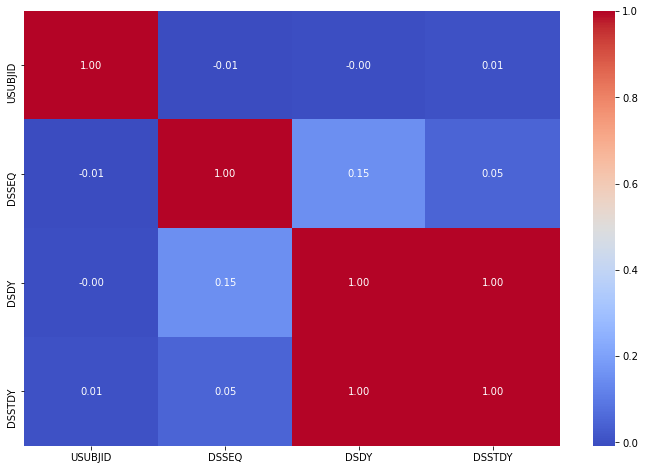

In [131]:
plt.figure(figsize=(12, 8))
corr = df.corr()
color = plt.get_cmap('coolwarm')
color.set_bad('lightgrey') 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns ,annot=True, fmt=".2f", cmap = color)
plt.show()

### Study identifier

We first look the number of records we have per study.

In [132]:
stdy_id_count = df['STUDYID'].value_counts()
stdy_id_count.sort_index(inplace = True)
stdy_id_count

EJPDEJ    2234
EOPNOJ     147
EORKWS      39
EQJJGF    1907
ERFCVU    4081
EUZJTB    1909
Name: STUDYID, dtype: int64

In [133]:
len(stdy_id_count)

6

We have 6 studies.

We then look at the number of people per study.

In [134]:
stdy_subid_count = df.groupby('STUDYID').USUBJID.nunique()
stdy_subid_count.sort_index(inplace = True)
stdy_subid_count

STUDYID
EJPDEJ    2234
EOPNOJ     147
EORKWS      35
EQJJGF    1907
ERFCVU    2647
EUZJTB    1875
Name: USUBJID, dtype: int64

In [135]:
sum(stdy_subid_count)

8845

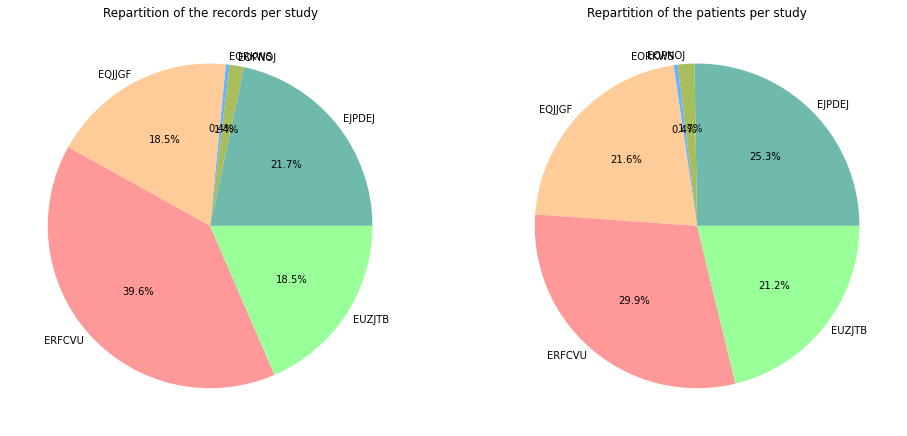

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

colors = ["#6FBAaD",'#A9BD5A', '#66b3ff', '#ffcc99','#ff9999','#99ff99', "#ffb266"]

ax1.pie(stdy_id_count.values,labeldistance=1.05, colors=colors, labels=stdy_id_count.index, autopct='%1.1f%%',
          startangle=0)

ax1.set_title("Repartition of the records per study")


ax2.pie(stdy_subid_count.values, labeldistance=1.05, colors=colors, labels=stdy_subid_count.index, autopct='%1.1f%%',
          startangle=0)

ax2.set_title("Repartition of the patients per study")

plt.show()

###  Domain abreviation 

In [137]:
df['DOMAIN'].value_counts()

DS    10317
Name: DOMAIN, dtype: int64

### Unique Subject Identifier for a study

In [138]:
max(df['USUBJID'].value_counts())

4

In [139]:
df['USUBJID'].nunique()

8845

### Observation Sequence Number for the same subject

In [140]:
df['DSSEQ'].value_counts()

1    8845
2    1439
3      19
4      14
Name: DSSEQ, dtype: int64

In [141]:
df_seq_max_count = df.groupby('USUBJID').DSSEQ.max().value_counts()
df_seq_max_count

1    7406
2    1420
4      14
3       5
Name: DSSEQ, dtype: int64

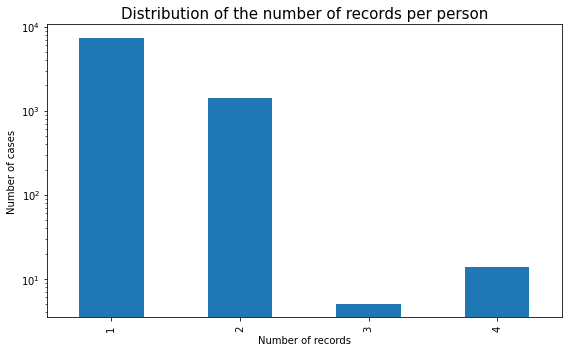

In [142]:
fig, ax = plt.subplots(figsize=(8,5))

df_seq_max_count.sort_index().plot(kind ="bar")

ax.set_title("Distribution of the number of records per person",size=15)
ax.set_xlabel('Number of records')
ax.set_ylabel('Number of cases')
plt.yscale('log')

fig.tight_layout()
plt.savefig('number records max.png', dpi=300)

plt.show()

In [143]:
df[df['DSSEQ'] == 4]

,STUDYID,DOMAIN,USUBJID,DSSEQ,DSTERM,DSMODIFY,DSDECOD,DSCAT,EPOCH,DSDY,DSSTDY,DSSTRF
4942,ERFCVU,DS,8266,4,DIED,DECEASED EBOLA,DEATH,DISPOSITION EVENT,TREATMENT,14.0,14.0,NaN
5070,ERFCVU,DS,680,4,DIED,DECEASED NEGATIVE,DEATH,DISPOSITION EVENT,TREATMENT,24.0,24.0,NaN
5121,ERFCVU,DS,3584,4,DISCHARGED,DISCHARGED NEGATIVE,OTHER,DISPOSITION EVENT,TREATMENT,22.0,22.0,NaN
5228,ERFCVU,DS,2847,4,DISCHARGED,DISCHARGED RECOVERED,RECOVERY,DISPOSITION EVENT,TREATMENT,29.0,29.0,NaN
5236,ERFCVU,DS,1154,4,DISCHARGED,DISCHARGED NEGATIVE,OTHER,DISPOSITION EVENT,TREATMENT,42.0,42.0,NaN
5335,ERFCVU,DS,2151,4,DIED,DECEASED NEGATIVE,DEATH,DISPOSITION EVENT,TREATMENT,58.0,58.0,NaN
5359,ERFCVU,DS,6051,4,DISCHARGED,DISCHARGED NEGATIVE,OTHER,DISPOSITION EVENT,TREATMENT,36.0,36.0,NaN
5367,ERFCVU,DS,908,4,DIED,DECEASED NEGATIVE,DEATH,DISPOSITION EVENT,TREATMENT,16.0,16.0,NaN
5768,ERFCVU,DS,7168,4,SURVIVED,DISCHARGED NEGATIVE,OTHER,DISPOSITION EVENT,TREATMENT,233.0,233.0,NaN
5792,ERFCVU,DS,6419,4,DIED,DECEASED NEGATIVE,DEATH,DISPOSITION EVENT,TREATMENT,64.0,64.0,NaN


In [144]:
df[df['USUBJID']== 908]

,STUDYID,DOMAIN,USUBJID,DSSEQ,DSTERM,DSMODIFY,DSDECOD,DSCAT,EPOCH,DSDY,DSSTDY,DSSTRF
5364,ERFCVU,DS,908,3,DECEASED,DECEASED NEGATIVE,DEATH,DISPOSITION EVENT,TREATMENT,16.0,16.0,NaN
5365,ERFCVU,DS,908,2,DISCHARGED,DISCHARGED NEGATIVE,OTHER,DISPOSITION EVENT,TREATMENT,3.0,3.0,NaN
5366,ERFCVU,DS,908,1,SURVIVED,DISCHARGED NEGATIVE,OTHER,DISPOSITION EVENT,TREATMENT,3.0,3.0,NaN
5367,ERFCVU,DS,908,4,DIED,DECEASED NEGATIVE,DEATH,DISPOSITION EVENT,TREATMENT,16.0,16.0,NaN


Be careful we can have SURVIVED and then DIED !!

We need to plot the evolution wtih respect to DSSEQ and DSSTDY.

In [145]:
df['DSMODIFY'] = df['DSMODIFY'].str.lower()

In [146]:
def one_to_two(row):
    if pd.isna(row.two):
        return row.one
    else:
        return row.two

def two_to_three(row):
    if pd.isna(row.three):
        return row.two
    else:
        return row.three
    
def three_to_four(row):
    if pd.isna(row.four):
        return row.three
    else:
        return row.four

In [147]:
temp = pd.DataFrame(df.groupby(['USUBJID','DSSEQ']).DSMODIFY.value_counts())
temp.columns = ['count']
temp.reset_index(inplace = True)
temp = temp.pivot(index ='USUBJID', columns ='DSSEQ', values = 'DSMODIFY')
temp.reset_index(inplace= True)
temp.columns = ['USUBJID', 'one', 'two', 'three', 'four']

temp.loc[temp['one'].isna(),'one'] = temp.loc[temp['one'].isna(),'two']
temp['two'] = temp.apply(lambda x : one_to_two(x), axis= 1)
temp['three'] = temp.apply(lambda x : two_to_three(x), axis= 1)
temp['four'] = temp.apply(lambda x : three_to_four(x), axis= 1)

temp['one'] = temp.apply(lambda x : x['one']+'_1', axis= 1)
temp['two'] = temp.apply(lambda x : x['two']+'_2', axis= 1)
temp['three'] = temp.apply(lambda x : x['three']+'_3', axis= 1)
temp['four'] = temp.apply(lambda x : x['four']+'_4', axis= 1)

temp = temp.groupby(['one', 'two', 'three', 'four']).size().reset_index(name="Time").sort_values(by ="Time",ascending = False)
temp

,one,two,three,four,Time
10,discharged negative_1,discharged negative_2,discharged negative_3,discharged negative_4,3347
15,discharged recovered_1,discharged recovered_2,discharged recovered_3,discharged recovered_4,1853
0,deceased ebola_1,deceased ebola_2,deceased ebola_3,deceased ebola_4,1353
1,deceased negative_1,deceased negative_2,deceased negative_3,deceased negative_4,262
22,not applicable_1,not applicable_2,not applicable_3,not applicable_4,260
24,transferred negative_1,transferred negative_2,transferred negative_3,transferred negative_4,228
5,deceased_1,deceased_2,deceased_3,deceased_4,37
18,escaped_1,escaped_2,escaped_3,escaped_4,27
20,negative_1,negative_2,negative_3,negative_4,26
23,transferred ebola_1,transferred ebola_2,transferred ebola_3,transferred ebola_4,17


In [148]:
links = []
links_dict = {}
for index, row in temp.iterrows():
    for s,t in zip(['one','two','three'],['two','three','four']):
        if (row[s], row[t]) not in links_dict:
            links_dict[(row[s], row[t])] = row['Time']
        else :
            links_dict[(row[s], row[t])] += row['Time']
                
for key, value in links_dict.items():         
    links.append({'source': key[0], 'target': key[1], 'value': value})

Links can be used to draw Sankey diagram.

### Reported Term for the Event

In [149]:
df['DSTERM'].isna().sum()

27

Not a lot of missing data.

In [150]:
df['DSTERM'].value_counts()

SURVIVED                                 1946
No case                                  1124
DISCHARGED                               1089
Cured (discharged)                        757
Deceased/Expired                          712
Death (positive, negative or unknown)     625
Not Recorded                              559
Not A Case (discharged)                   510
Recovered/Cured                           502
Deceased                                  480
DIED                                      428
Recovered                                 376
DECEASED                                  270
Transferred                               263
NOT ADMITTED                              262
Sorti_négatif                              60
Décèdé                                     53
TRANSFERRED TO OTHER FACILITY              52
Dead/Expired                               48
DIED ON ARRIVAL                            32
Defaulter/Escaped                          32
Escaped                           

We have a modified version.

In [151]:
df['DSMODIFY'].isna().sum()

1404

A lot of missing values.

In [152]:
dsterm_dsmodify_empty = df.loc[df['DSMODIFY'].isna(),'DSTERM'].value_counts()
dsterm_dsmodify_empty

Death (positive, negative or unknown)    625
Not Recorded                             559
Deceased/Expired                          85
Transferred                               67
Defaulter/Escaped                         32
Dead/Expired                              19
Recovered/Cured                            4
DISCHARGED                                 3
COMPLETED                                  3
Defaulter                                  3
SURVIVED                                   2
Unknown                                    1
LOST TO FOLLOW-UP                          1
Name: DSTERM, dtype: int64

In [153]:
df.loc[~df['DSMODIFY'].isna() & (df.DSTERM.isin(dsterm_dsmodify_empty.index)), ['DSTERM','DSMODIFY']]

,DSTERM,DSMODIFY
214,Transferred,transferred ebola
525,Transferred,transferred ebola
626,Transferred,transferred negative
631,Transferred,transferred negative
647,Transferred,transferred negative
...,...,...
8401,DISCHARGED,discharged negative
8402,SURVIVED,discharged negative
8405,DISCHARGED,discharged negative
8406,SURVIVED,discharged negative


In [154]:
dsterm_to_dsmodifiy = {'Death (positive, negative or unknown)' : 'deceased', 
                       'Not Recorded' : 'unknown outcome', 'Deceased/Expired' : 'deceased',
                       'Transferred' : 'transferred', 'Defaulter/Escaped' : 'escaped',
                       'Dead/Expired' :'deceased', 'Recovered/Cured' : 'recovered',
                       'DISCHARGED' : 'discharged', 'COMPLETED' : 'discharged', 
                       'Defaulter' : 'escaped', 'SURVIVED' : 'discharged recovered',
                       'Unknown' : 'unknown outcome', 'LOST TO FOLLOW-UP' : 'unknown outcome'}

In [156]:
def correct_dsmodify(row):
    if pd.isnull(row.DSMODIFY):
        return dsterm_to_dsmodifiy[row.DSTERM]
    else:
        return row.DSMODIFY

In [157]:
df['DSMODIFY'] = df.apply(correct_dsmodify,axis = 1)

In [158]:
df['DSMODIFY'].value_counts()

discharged negative      4368
discharged recovered     1978
deceased ebola           1522
deceased                  775
unknown outcome           562
deceased negative         370
transferred negative      270
not applicable            262
transferred                69
escaped                    62
negative                   26
transferred ebola          17
inconsistent outcome       16
discharged                  6
transferred recovered       5
escaped negative            4
recovered                   4
escaped ebola               1
Name: DSMODIFY, dtype: int64

In [159]:
df['DSMODIFY'].isna().sum()

0

We have a standardized version. 

In [160]:
df['DSDECOD'].isna().sum()

0

In [161]:
df_term_codified = df['DSDECOD'].value_counts().sort_values()
df_term_codified

LOST TO FOLLOW-UP       1
COMPLETED               3
SCREEN FAILURE       1150
RECOVERY             1483
DEATH                2667
OTHER                5013
Name: DSDECOD, dtype: int64

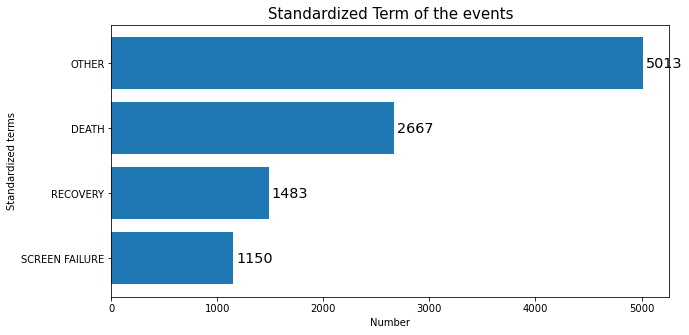

In [162]:
fig, ax = plt.subplots(figsize=(10,5))

y = df_term_codified.values[2:]
x = df_term_codified.index[2:]
ax.barh(x, y, align='center')

ax.set_title("Standardized Term of the events",size=15)
ax.set_xlabel('Number')
ax.set_ylabel('Standardized terms')

for i, v in enumerate(y):
    ax.text(v + 30, i , str(v),{'fontsize' : 'x-large','verticalalignment' : 'center'})
    
plt.show()

In [163]:
df_DSDECOD_DSTERM = pd.DataFrame(df.groupby('DSDECOD').DSTERM.value_counts())
df_DSDECOD_DSTERM.columns = ['count']
df_DSDECOD_DSTERM

count
DSDECOD           DSTERM                                      
COMPLETED         COMPLETED                                  3
DEATH             Deceased/Expired                         712
                  Death (positive, negative or unknown)    625
                  Deceased                                 480
                  DIED                                     428
                  DECEASED                                 267
                  Décèdé                                    53
                  Dead/Expired                              48
                  DEATH                                     27
                  DIED ON ARRIVAL                           27
LOST TO FOLLOW-UP LOST TO FOLLOW-UP                          1
OTHER             SURVIVED                                1749
                  DISCHARGED                               978
                  Not Recorded                             559
                  Not A Case (discharged)                  510
                  Recovered/Cured                          502
                  Transferred                              263
                  NOT ADMITTED                             262
                  Sorti_négatif                             60
                  TRANSFERRED TO OTHER FACILITY             47
                  Defaulter/Escaped                         32
                  Escaped                                   31
                  DIED ON ARRIVAL                            5
                  Transféré                                  4
                  DECEASED                                   3
                  Defaulter                                  3
                  CAREGIVER ONLY                             2
                  UNKNOWN                                    1
                  Unknown                                    1
RECOVERY          Cured (discharged)                       757
                  Recovered                                376
                  SURVIVED                                 197
                  DISCHARGED                               111
                  Sorti_guérie                              30
                  TRANSFERRED TO OTHER FACILITY              5
                  ACHIEVED DISCHARGE CRITERIA                3
                  ALIVE DISCHARGED                           3
                  ALIVE ADMITTED                             1
SCREEN FAILURE    No case                                 1124

In [178]:
dsterm_to_dsdecod = {'COMPLETED' : 'RECOVERY', 'LOST TO FOLLOW-UP' : 'OTHER',
                    'SURVIVED' : 'RECOVERY', 'DISCHARGED' : 'RECOVERY', 'Not A Case (discharged)' : 'RECOVERY',
                    'Recovered/Cured' : 'RECOVERY', 'DECEASED' : 'DEATH',  'DIED ON ARRIVAL' : 'DEATH',
                    'Sorti_négatif' : 'RECOVERY'}

In [179]:
def correct_dsdecod(row):
    if row.DSTERM in dsterm_to_dsdecod:
        return dsterm_to_dsdecod[row.DSTERM]
    else:
        return row.DSDECOD

In [180]:
df['DSDECOD'] = df.apply(correct_dsdecod,axis = 1)

In [181]:
df_term_codified = df['DSDECOD'].value_counts().sort_values()
df_term_codified

SCREEN FAILURE    1150
OTHER             1207
DEATH             2675
RECOVERY          5285
Name: DSDECOD, dtype: int64

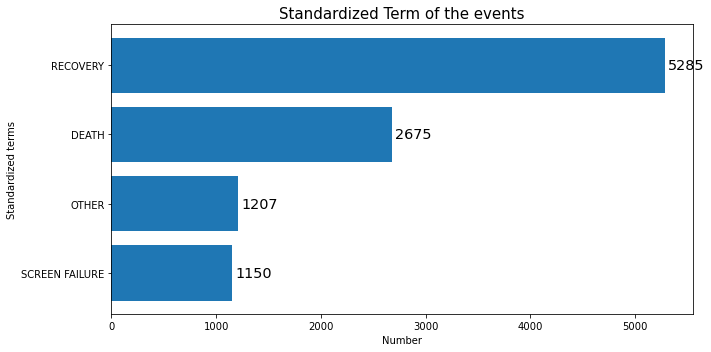

In [184]:
fig, ax = plt.subplots(figsize=(10,5))

y = df_term_codified.values
x = df_term_codified.index
ax.barh(x, y, align='center')

ax.set_title("Standardized Term of the events",size=15)
ax.set_xlabel('Number')
ax.set_ylabel('Standardized terms')

for i, v in enumerate(y):
    ax.text(v + 30, i , str(v),{'fontsize' : 'x-large','verticalalignment' : 'center'})
    
fig.tight_layout()
plt.savefig('modified stdz dsterm.png', dpi=300)

plt.show()

We also have a subcategorization of the event. 

In [164]:
df['DSCAT'].value_counts()

DISPOSITION EVENT     10313
PROTOCOL MILESTONE        4
Name: DSCAT, dtype: int64

It's really not informative.

### Epoch period of the observation

In [165]:
df['EPOCH'].value_counts()

TREATMENT    10014
FOLLOW-UP        4
SCREENING        1
Name: EPOCH, dtype: int64

### Study Day of Observation/Collection

In [166]:
df['DSDY'].isna().sum() / len(df)

0.5913540757972279

In [167]:
df['DSDY'].value_counts().head()

4.0    1527
3.0     665
2.0     471
1.0     465
5.0     413
Name: DSDY, dtype: int64

We have a lot of nan values.

In [168]:
df[df['DSDY'] == -1]

,STUDYID,DOMAIN,USUBJID,DSSEQ,DSTERM,DSMODIFY,DSDECOD,DSCAT,EPOCH,DSDY,DSSTDY,DSSTRF
6059,ERFCVU,DS,1851,1,DIED,deceased negative,DEATH,DISPOSITION EVENT,TREATMENT,-1.0,NaN,DURING


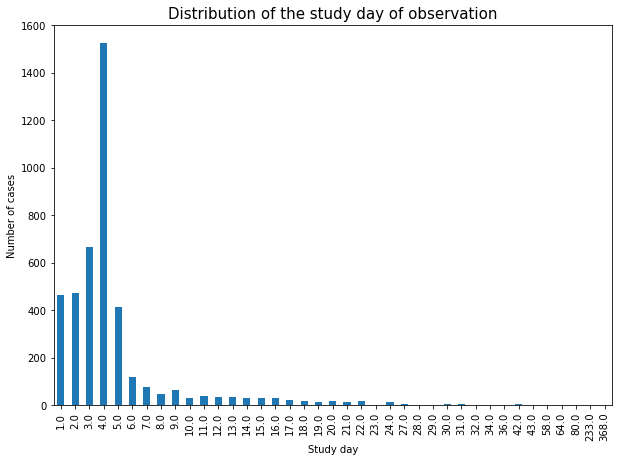

In [169]:
fig, ax = plt.subplots(figsize=(10,7))

#Remove the -1
df['DSDY'].value_counts().sort_index()[1:].plot(kind ="bar")

ax.set_title("Distribution of the study day of observation",size=15)
ax.set_xlabel('Study day')
ax.set_ylabel('Number of cases')

plt.show()

In [186]:
sum(df['DSDY'] == df['DSSTDY'])

3742

In [189]:
sum(~df['DSDY'].isna())

4216

The study day of the collection of the test or examination specimen is generally done during the 4th day. An output of -1 has been removed of the plot.

### Study Day of Start of Observation

In [170]:
df['DSSTDY'].isna().sum() / len(df)

0.048754482892313655

Not a lot of missing data

In [171]:
df['DSSTDY'].value_counts()

 4.0        2178
 2.0        1736
 3.0        1436
 5.0         740
 1.0         728
            ... 
 1954.0        1
-42037.0       1
-41884.0       1
 37.0          1
-41979.0       1
Name: DSSTDY, Length: 136, dtype: int64

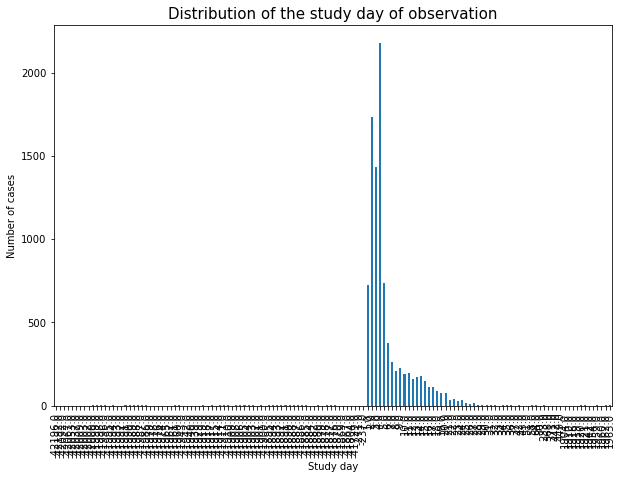

In [172]:
fig, ax = plt.subplots(figsize=(10,7))

#Remove the -1
df['DSSTDY'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the study day of observation",size=15)
ax.set_xlabel('Study day')
ax.set_ylabel('Number of cases')

plt.show()

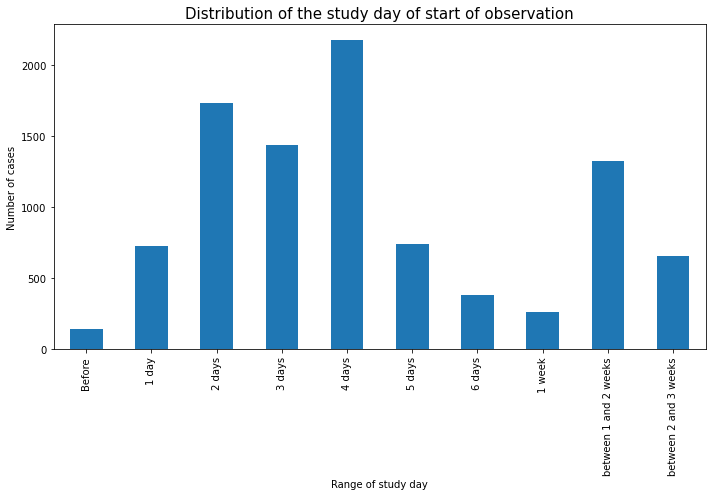

In [190]:
fig, ax = plt.subplots(figsize=(10,7))

bins = [int(i) for i in range(8)] 
bins = [float('-infinity')] + bins + [14, 21]

df_values = df['DSSTDY']
df_bined = df_values.groupby(pd.cut(df['DSSTDY'], bins=bins)).count()
df_bined.plot(kind='bar')

ax.set_title("Distribution of the study day of start of observation",size=15)
ax.set_xlabel('Range of study day')
ax.set_ylabel('Number of cases')

positions = range(0,10)
labels = ("Before", "1 day", "2 days", "3 days","4 days","5 days","6 days", "1 week", "between 1 and 2 weeks", "between 2 and 3 weeks")
plt.xticks(positions, labels)

fig.tight_layout()
plt.savefig('DSSTDY distribution grouped.png', dpi=300)

plt.show()

**Question difference between DSSTDY and DSDY ?**

### Start Relative to Reference Period

In [174]:
df['DSSTRF'].isna().sum() /len(df)

0.9549287583599884

A big part of it is not present. 

In [175]:
df['DSSTRF'].value_counts()

DURING    465
Name: DSSTRF, dtype: int64

## Features for the models

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10317 entries, 0 to 10316
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   10317 non-null  object 
 1   DOMAIN    10317 non-null  object 
 2   USUBJID   10317 non-null  int64  
 3   DSSEQ     10317 non-null  int64  
 4   DSTERM    10290 non-null  object 
 5   DSMODIFY  10317 non-null  object 
 6   DSDECOD   10317 non-null  object 
 7   DSCAT     10317 non-null  object 
 8   EPOCH     10019 non-null  object 
 9   DSDY      4216 non-null   float64
 10  DSSTDY    9814 non-null   float64
 11  DSSTRF    465 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 967.3+ KB


In [177]:
#use to join the dataframes
ids = ['USUBJID']

#be careful DSSTDY is sometimes inconsistent
features = ['DSSEQ', 'DSTERM', 'DSDECOD', 'DSSTDY']

df_model = df.loc[:,ids+features]
df_model.set_index('USUBJID',inplace = True)
df_model.head()

,DSSEQ,DSTERM,DSDECOD,DSSTDY
USUBJID,,,,
8027,1,Recovered,RECOVERY,6.0
3315,1,No case,SCREEN FAILURE,2.0
1953,1,No case,SCREEN FAILURE,3.0
9366,1,Deceased,DEATH,6.0
6561,1,No case,SCREEN FAILURE,1.0
